In [1]:
#importing necessary liabraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [2]:
#reading data
df=pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Data Preprocessing

In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.drop(['purpose'],axis=1,inplace=True)

<AxesSubplot:>

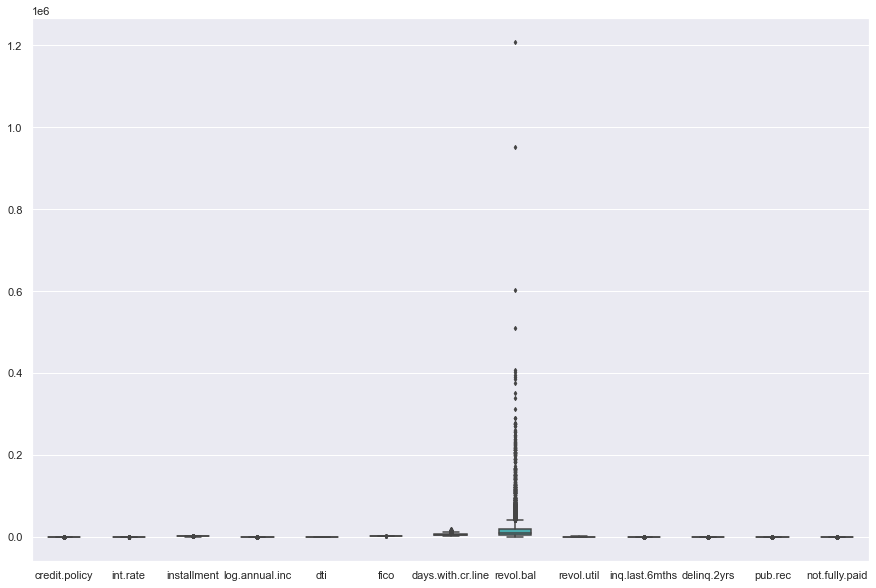

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

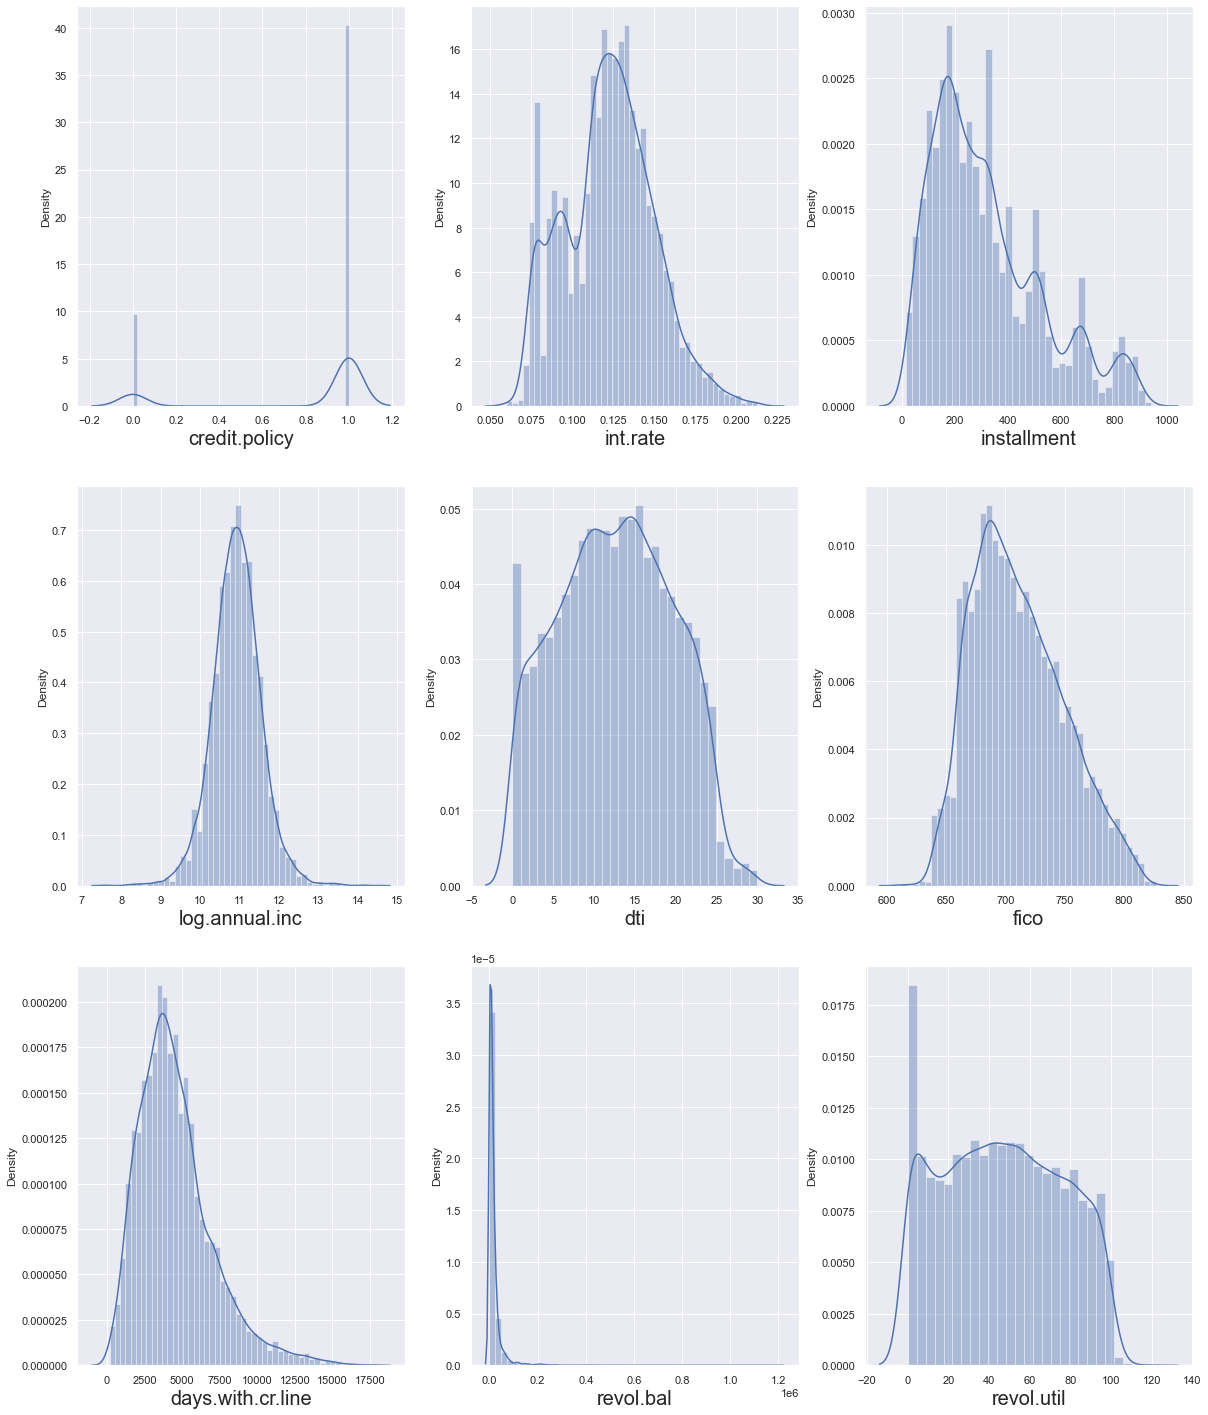

In [8]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
a=df['int.rate'].quantile(0.98)
data_cleaned=df[df['int.rate']<a]
a=df['installment'].quantile(0.98)
data_cleaned=df[df['installment']<a]
a=df['days.with.cr.line'].quantile(0.98)
data_cleaned=df[df['days.with.cr.line']<a]
a=df['days.with.cr.line'].quantile(0.95)
data_cleaned=df[df['days.with.cr.line']<a]
a=df['revol.bal'].quantile(0.95)
data_cleaned=df[df['revol.bal']<a]
a=df['revol.util'].quantile(0.95)
data_cleaned=df[df['revol.util']<a]

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

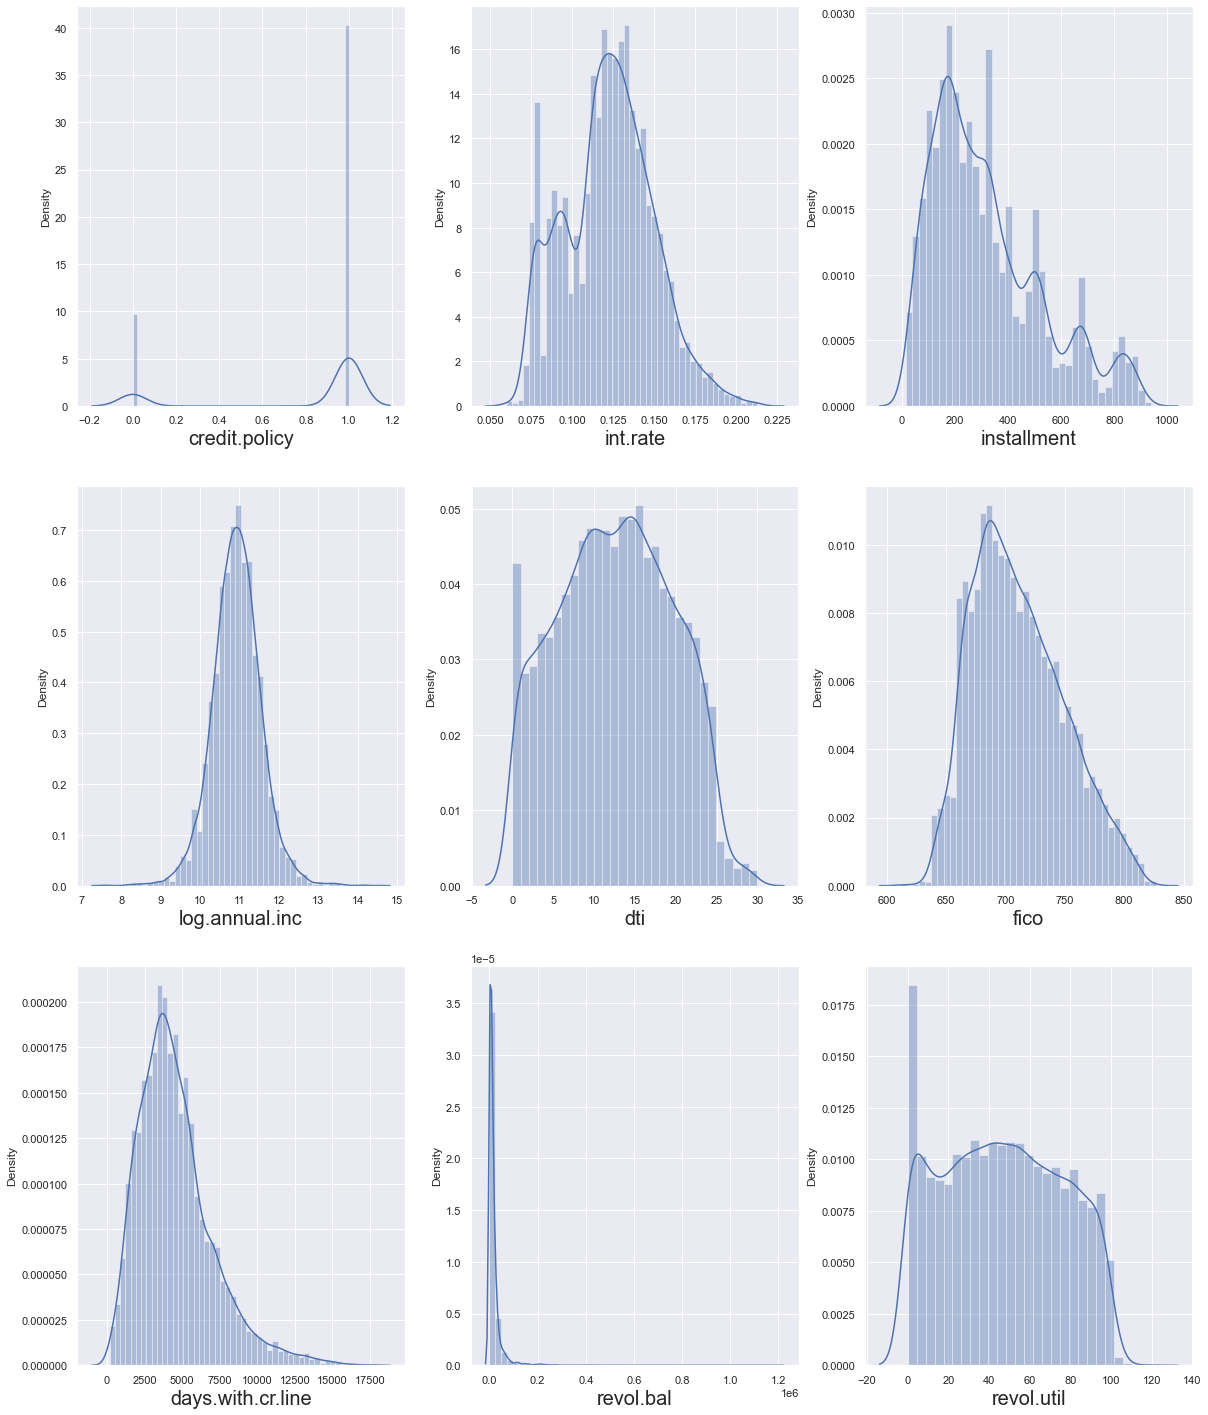

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
x=df.drop(columns=['not.fully.paid'])
y=df['not.fully.paid']

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Komal\anacond

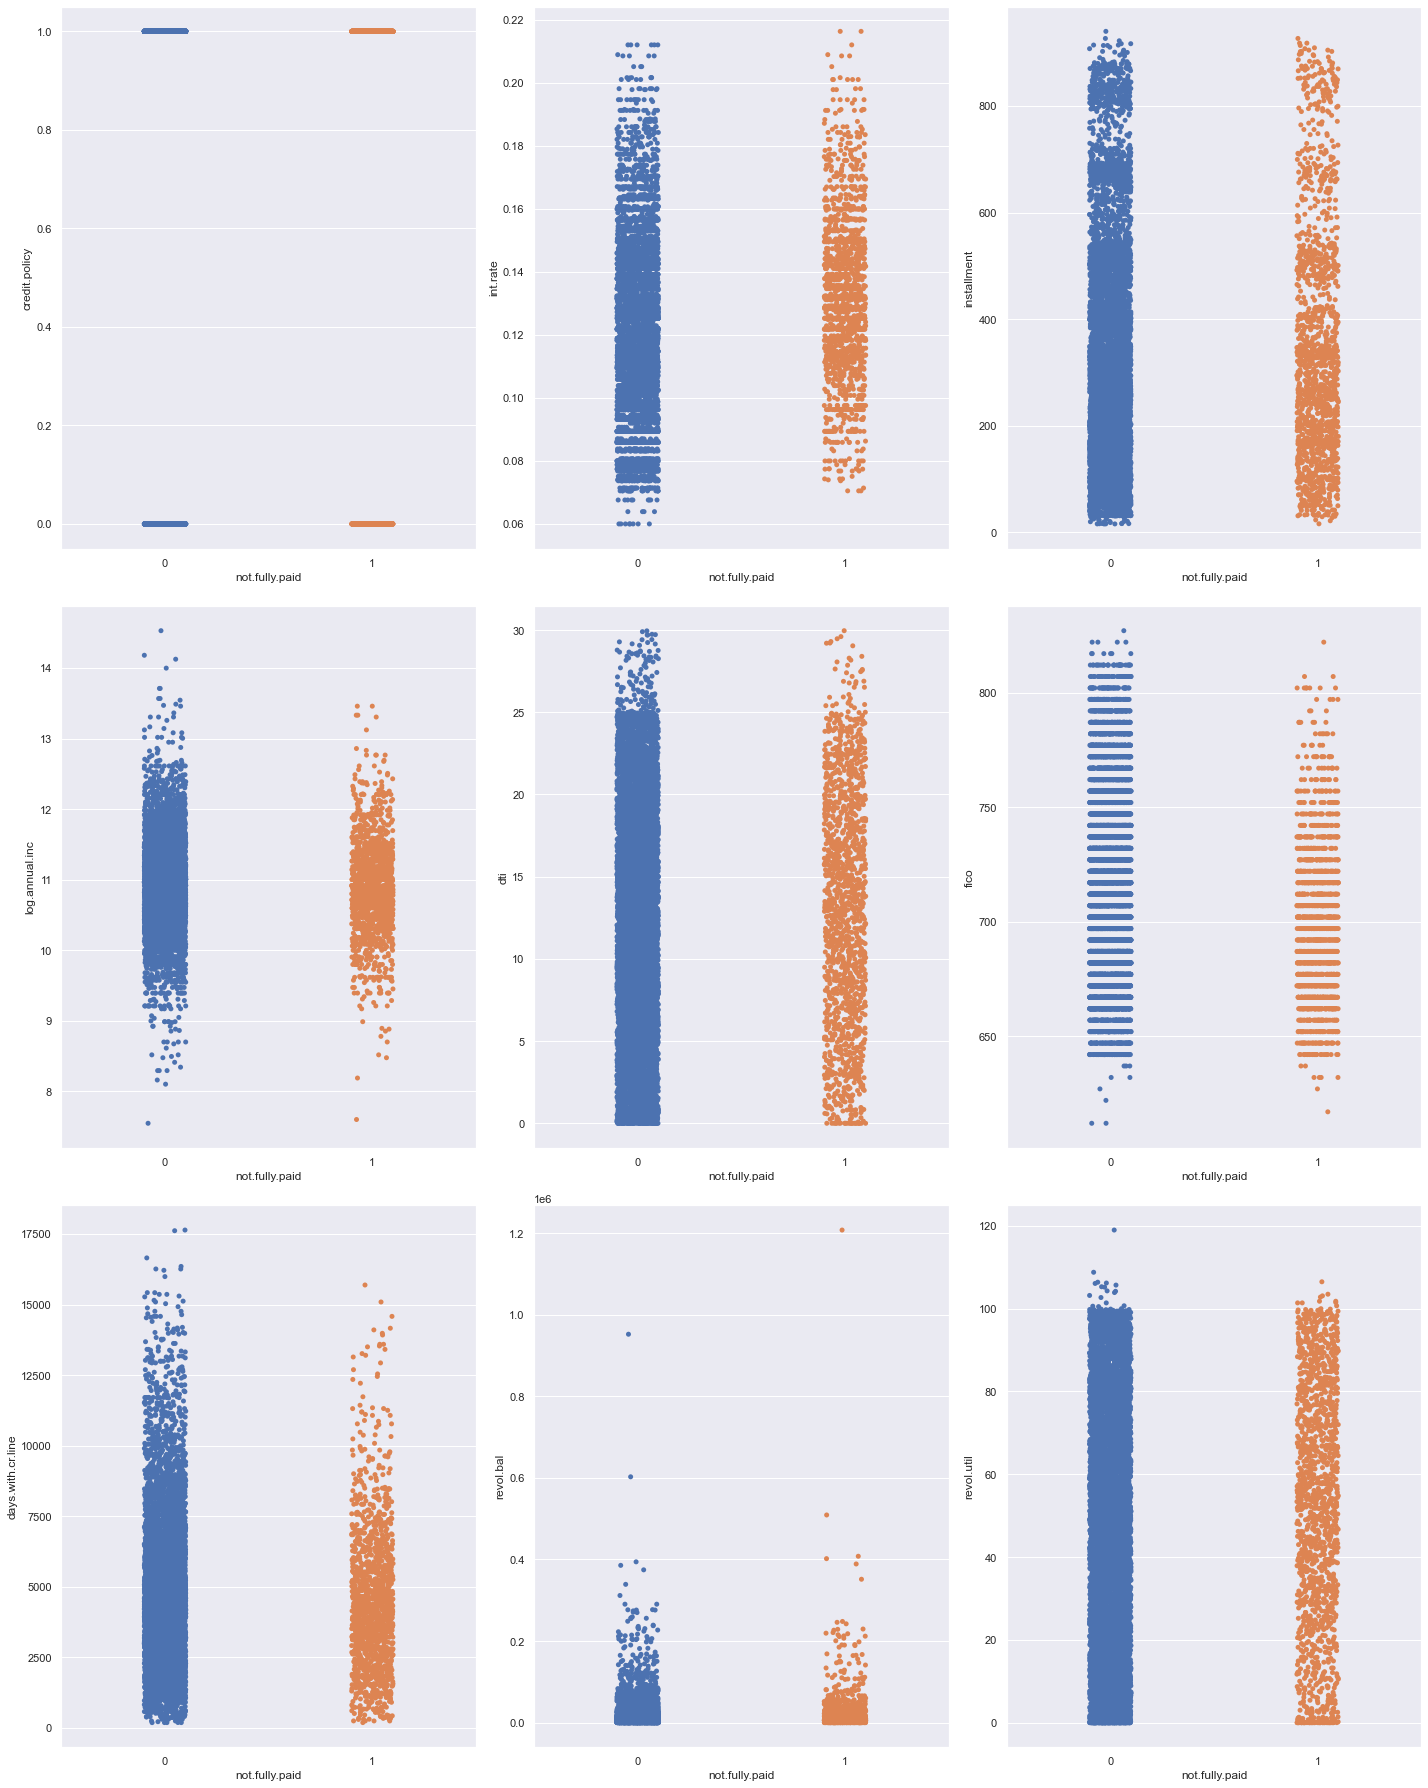

In [12]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.49222226, -0.13931753,  2.46309947, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226, -0.57886837, -0.43885443, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226,  0.48648368,  0.23070836, ..., -0.26247044,
        -0.29973008, -0.23700318],
       ...,
       [-2.03160257, -0.57886837, -1.06867038, ...,  2.91915909,
        -0.29973008, -0.23700318],
       [-2.03160257,  1.39166043,  0.1569135 , ...,  1.55560358,
        -0.29973008, -0.23700318],
       [-2.03160257,  0.61685894,  2.58060136, ...,  2.01012208,
        -0.29973008, -0.23700318]])

In [14]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,1.661680,credit.policy
1,2.740399,int.rate
2,1.602319,installment
3,1.529215,log.annual.inc
4,1.197613,dti
5,3.319104,fico
6,1.305100,days.with.cr.line
7,1.364227,revol.bal
8,1.725801,revol.util
9,1.457600,inq.last.6mths


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Logostic Regression

In [48]:
#performing logistic regression
lm=LogisticRegression()
lm.fit(x_train,y_train)

C:\Users\Komal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lm.score(x_train,y_train)

0.8396213281358764

In [50]:
lm.score(x_test,y_test)

0.8405010438413362

In [19]:
y_pred=lm.predict(x_test)

In [20]:
import pickle
with open('ModelForPrediction','wb') as f:
    pickle.dump(lm,f)
    
with open('standardscalar.sav','wb') as f:
    pickle.dump(scaler,f)
    

In [21]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8405010438413362

In [22]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[2011,    3],
       [ 379,    2]], dtype=int64)

In [23]:
true_positive=con_mat[0][0]
false_positive=con_mat[0][1]
false_negative=con_mat[1][0]
true_negative=con_mat[1][1]

In [24]:
precision= true_positive/(true_positive+false_positive)
precision

0.9985104270109235

In [25]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.8414225941422594

In [26]:
F1_score=(2*precision*Recall)/(precision+Recall)
F1_score

0.9132606721162578

In [27]:
auc=roc_auc_score(y_test,y_pred)
auc

0.5018798854214722

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

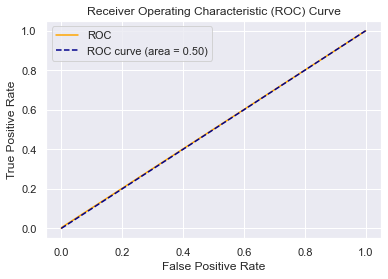

In [29]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Decision Tree

In [30]:
#checking for decision tree
from sklearn.tree import DecisionTreeClassifier
cd=DecisionTreeClassifier()

In [31]:
cd.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
cd.score(x_train,y_train)

1.0

In [33]:
cd.score(x_test,y_test)

0.7394572025052192

In [34]:
y_pred=cd.predict(x_test)

In [35]:
auc=roc_auc_score(y_test,y_pred)
auc

0.5418233780856837

In [36]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [37]:
grid_search = GridSearchCV(estimator=cd,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [39]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 8, 'splitter': 'random'}


In [ ]:
grid_search.fit(x_train,y_train)

In [40]:
grid_search.best_score_

0.8424822197736151

Random forest

In [36]:
#checking for random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
rf.score(x_train,y_train)

0.9998607824028958

In [38]:
rf.score(x_test,y_test)

0.837160751565762

In [39]:
y_pred=rf.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.837160751565762

Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
adaboost=AdaBoostClassifier(n_estimators=100,base_estimator=None,learning_rate=1,random_state=1)

In [19]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=1)

In [20]:
y_pred=adaboost.predict(x_test)

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1985,   29],
       [ 367,   14]], dtype=int64)

In [26]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8346555323590814

In [29]:
true_positive=cm[0][0]
false_positive=cm[0][1]
false_negative=cm[1][0]
true_negative=cm[1][1]

In [31]:
precision= true_positive/(true_positive+false_positive)
precision

0.9856007944389275

In [32]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.8439625850340136

In [33]:
F1_score=(2*precision*Recall)/(precision+Recall)
F1_score

0.9092991296381127

In [34]:
auc=roc_auc_score(y_test,y_pred)
auc

0.5111731006315373

Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost=GradientBoostingClassifier(n_estimators=20,learning_rate=1,random_state=0)

In [36]:
gradient_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=20, random_state=0)

In [37]:
y_pred=gradient_boost.predict(x_test)

In [38]:
gradient_boost.score(x_train,y_train)

0.8610608380899346

In [39]:
gradient_boost.score(x_test,y_test)

0.8288100208768268

In [41]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1956,   58],
       [ 352,   29]], dtype=int64)

In [42]:
true_positive=cm[0][0]
false_positive=cm[0][1]
false_negative=cm[1][0]
true_negative=cm[1][1]

In [43]:
precision=true_positive/(true_positive+false_positive)
precision

0.971201588877855

In [45]:
recall=true_positive/(true_positive+false_negative)
recall

0.8474870017331022

In [46]:
F1_score=(2*precision*Recall)/(precision+Recall)
F1_score

0.9031225002331855

#ACCURACY by different Algorithms:
    Logistic Rgression:0.8405010438413362
    Decision Tree:0.8424822197736151
    Random Forest:0.837160751565762
    Adaboost:0.8346555323590814
    Gradient Bosting:0.8288100208768268